# **Assessment 2**


# Import Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn is another good plotting library. In particular, I like it for heatmaps (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
import time
# a helper package to help us iterate over objects
import itertools
import nltk
import spacy
nltk.download('stopwords')
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from time import process_time



## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

## LDA
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from sklearn import preprocessing
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# To export as pdf with better quality plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




---



# The Dataset

## Load the Data

In [ ]:
## Data sample

# training = pd.read_csv('/content/drive/MyDrive/CAB420 Assignment 2/training_balanced.csv')
# test = pd.read_csv('/content/drive/MyDrive/CAB420 Assignment 2/testing_balanced.csv')
# val = pd.read_csv('/content/drive/MyDrive/CAB420 Assignment 2/validation_balanced.csv')

training = pd.read_csv('/content/drive/MyDrive/training_balanced.csv')

val = pd.read_csv('/content/drive/MyDrive/validation_balanced.csv')

test = pd.read_csv('/content/drive/MyDrive/testing_balanced.csv')

## Data Splitting

In [ ]:

## Training
train_X = training.iloc[:7200,-1]
train_Y = training.iloc[:7200,0]

## Testing
test_X= test.iloc[:2400,-1]
test_Y = test.iloc[:2400,0]


## Validation
val_X = val.iloc[:2400,-1]
val_Y = val.iloc[:2400,0]

## Pre-Processing

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
count_vect = CountVectorizer(stop_words='english',min_df=0.0001, max_df=0.25)


X_train_counts = count_vect.fit_transform(train_X)


In [ ]:
print(X_train_counts.shape)
print(train_X[2])
print(X_train_counts[2])

(7200, 73289)
I received another call from Dana Dellacona at Hess asking about online andoffline trading.  I'll direct her once again to Tana for online trading.I'll ask her again to describe the products they want to trade.Will you evaluate?Sara ShackletonEnron North America Corp.1400 Smith Street, EB 3801aHouston, Texas  77002713-853-5620 (phone)713-646-3490 (fax)sara.shackleton@enron.comSara ShackletonECT and Hess have an executed ISDA effective 1/29/98.Guess what they want?  The following ISDA agreements to trade financial (and(1)  Amerada Hess Corp.   and  ENA(2)  Hess Energy Services Company, LLC and  ENA(3)  Hess Energy Trading Company, LLC  and  ELFI(4)  Hess Energy Trading Company, LLC  and ECT Singapore Pte. Ltd.(5)  Hess Energy Trading Company, LLC  and ECTRICI explained our financial trading entities.She did not know what products each of the Hess affiliates would be trading.Please let me know who will handle in credit (and I'll intercede with thelawyer).  TO MY KNOWLEDGE, 

In [ ]:
print(count_vect.vocabulary_)

{'email': 27058, 'article': 12725, 'friend': 31380, '20': 1414, 'printer': 53103, 'friendly': 31384, 'version': 69651, 'new': 46756, 'york': 72733, 'dow': 25302, 'jones': 39160, 'corp': 21668, 'ene': 27337, 'news': 46834, 'msgs': 45846, 'current': 22496, 'chief': 18663, 'executiv': 29049, '20and': 2326, 'chairman': 18339, 'kenneth': 40023, 'lay': 41135, 'said': 57445, 'wednesday': 70676, 'categorically': 17947, 'won': 71985, '20taking': 4648, 'job': 38979, 'presidential': 52915, 'administration': 9327, '20lay': 3630, 'strong': 62018, 'supporter': 62532, 'texas': 63772, 'gov': 32936, 'george': 32247, 'bush': 16726, 'rumored': 57240, '20a': 2199, 'potential': 52506, 'candidate': 17457, 'cabinet': 17108, 'position': 52416, 'event': 28807, '20administration': 2249, 'rumors': 57242, 'fueled': 31602, '20announced': 2331, 'stepping': 61616, 'executive': 29050, 'company': 20315, '20effective': 3011, 'feb': 29701, '12': 813, 'remain': 55458, '20board': 2488, 'stock': 61753, 'insight': 36909, 's

In [ ]:
X_test_counts = count_vect.transform(test_X)
print(X_test_counts.shape)
X_val_counts = count_vect.transform(val_X)
print(X_val_counts.shape)

(2400, 73289)
(2400, 73289)


# KNN - Ash

In [ ]:
## Grid Search
time_1 = time.process_time()

param_grid = {'n_neighbors' : list(range(1,131)), 'weights' : ['uniform', 'distance']}
cknn = KNeighborsClassifier()
grid_search = GridSearchCV(cknn, param_grid)
grid_search.fit(X_val_counts, val_Y)
grid_search.cv_results_

time_2 = time.process_time()
print('Time to find best values for KNN:     %f seconds' % (time_2 - time_1))

In [ ]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

## Select the best system from results
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]

## KNN Model
time_1 = time.process_time()

cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train_counts, train_Y)
eval_model(cknn, X_train_counts, train_Y, X_test_counts, test_Y)

time_2 = time.process_time()
print('Time to model KNN (Inference):     %f seconds' % (time_2 - time_1))



---



# LSTM - Ray

In [ ]:
# Converting Y labels to one-hot vectors of size 20 unique senders (classes) for each dataset
train_lab = preprocessing.LabelBinarizer()
train_lab.fit(train_Y)
Y_train_labels = train_lab.transform(train_Y)

val_lab = preprocessing.LabelBinarizer()
val_lab.fit(val_Y)
Y_val_labels = val_lab.transform(val_Y)

test_lab = preprocessing.LabelBinarizer()
test_lab.fit(test_Y)
Y_test_labels = test_lab.transform(test_Y)

In [ ]:
# Word embeddings - converting email bodies into integer sequences and padding to be same length
max_words = 50000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_X)
train_sequences = []
for seq_t in tokenizer.texts_to_sequences_generator(train_X):
    train_sequences.append(seq_t)

val_sequences = []
for seq_v in tokenizer.texts_to_sequences_generator(val_X):
    val_sequences.append(seq_v)

test_sequences = []
for seq_tt in tokenizer.texts_to_sequences_generator(test_X):
    test_sequences.append(seq_tt)

def find_max_list(list):
    list_len = [len(i) for i in list]
    return (max(list_len))

#Can't use the maximum length of a sequence as it's way too big.
#max_length_seq = max(find_max_list(train_sequences), find_max_list(val_sequences), find_max_list(test_sequences))
max_length = 250

train_padded_X = pad_sequences(train_sequences, maxlen=max_length, padding='post')

val_padded_X = pad_sequences(val_sequences, maxlen=max_length, padding='post')

test_padded_X = pad_sequences(test_sequences, maxlen=max_length, padding='post')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 250, 64)          41216     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 250, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

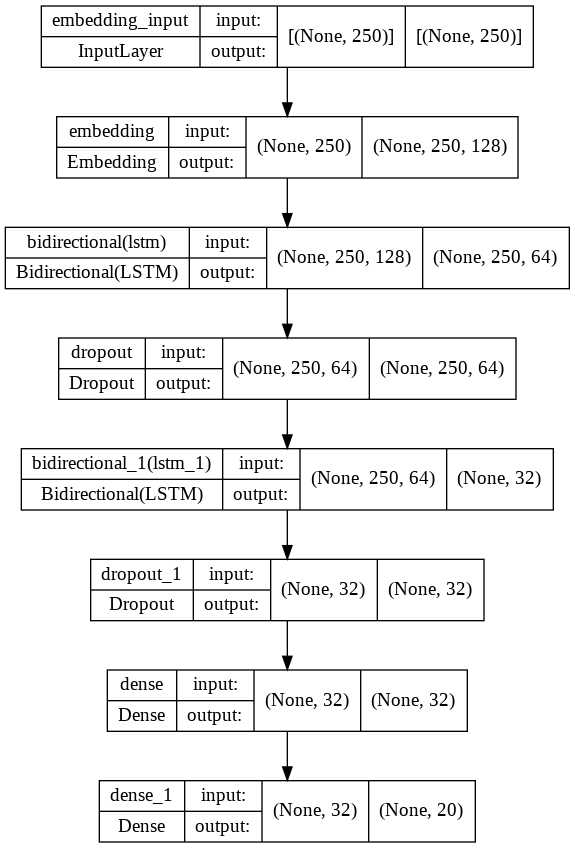

In [ ]:
#LSTM Model - Stacked Bidirection LSTMs, inputs of size 250, outputs of size 20 one-hot vectors
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(16, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='sigmoid'))

print(model.summary())
plot_model(model, show_shapes=True)

In [ ]:
# Attempting to balance class biasness using weights
one_hot_v = np.argmax(Y_train_labels,axis=1)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(one_hot_v.flatten()),
                                     y=one_hot_v.flatten())
print(class_weights)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)

[1.77339901 1.74757282 0.80898876 1.5        0.74380165 1.48760331
 2.01117318 0.67164179 1.18811881 0.48452221 1.71428571 1.31386861
 1.20401338 0.6360424  1.875      0.80357143 1.20401338 1.51260504
 0.92544987 0.51136364]
{0: 1.7733990147783252, 1: 1.7475728155339805, 2: 0.8089887640449438, 3: 1.5, 4: 0.743801652892562, 5: 1.487603305785124, 6: 2.011173184357542, 7: 0.6716417910447762, 8: 1.188118811881188, 9: 0.4845222072678331, 10: 1.7142857142857142, 11: 1.313868613138686, 12: 1.2040133779264215, 13: 0.6360424028268551, 14: 1.875, 15: 0.8035714285714286, 16: 1.2040133779264215, 17: 1.5126050420168067, 18: 0.9254498714652957, 19: 0.5113636363636364}


In [ ]:
#Compile and train the model using training data with validation data
time_1 = process_time()

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

history = model.fit(train_padded_X, Y_train_labels,
          batch_size=128,
          epochs=350,
          validation_data=[val_padded_X, Y_val_labels],
          class_weight=class_weights_dict)

time_2 = process_time()
print('Time to train LSTM:   %f seconds' % (time_2 - time_1))

In [ ]:
# Evaluate against the test data, draw ConfusionMatrixes and Loss-Accuracy graphs
def eval_model(model, x_train, y_train, x_test, y_test, history):
    #Manually entering labels, because for_estimator doesn't work with one-hot vectors, an alternate to rotate the X labels.
    labels = ["benjamin.rogers@enron.com", "carol.claeir@enron.com","chris.germany@enron.com", "debra.perlingiere@enron.com", "enron.announcement@enron.com",
              "eric.bass@enron.com", "gerald.nemec@enron.com", "jeff.dasovich@enron.com", "kate.sysmes@enron.com", "kay.mann@enron.com", "mark.taylor@enron.com",
              "mathew.lenhart@enron.com", "no.address@enron.com", "pete.davis@enron.com", "sally.beck@enron.com", "sara.shackleton@enron.com", "steven.kean@enron.com",
              "susan.scott@enron.com", "tana.jones@enron.com", "vince.kaminski@enron.com"]

    fig = plt.figure(figsize=[20, 6])
    train_scores = model.evaluate(x_train, y_train, verbose=2)
    test_scores = model.evaluate(x_test, y_test, verbose=2)

    pred_t = model.predict(x_train)
    pred = model.predict(x_test);

    #Training ConfusionMatrix
    cmt = confusion_matrix(y_train.argmax(axis=1), pred_t.argmax(axis=1))
    ax = fig.add_subplot(1, 1, 1)
    ct = ConfusionMatrixDisplay(cmt, display_labels=labels)
    ct.plot(ax = ax)
    ax.tick_params('x', labelrotation=90)
    ax.set_title("Train Accuracy: %f " % train_scores[1])

    #Test ConfusionMatrix
    fig = plt.figure(figsize=[20, 6])
    cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax)
    ax.tick_params('x', labelrotation=90)
    ax.set_title("Test Accuracy: %f " % test_scores[1])

    fig = plt.figure(figsize=[20, 6])

    #Loss-Accuracy Graph
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(history.history["loss"], label="loss")
    ax.plot(history.history["val_loss"], label="val_loss")
    ax.plot(history.history["accuracy"], label="accuracy")
    ax.plot(history.history["val_accuracy"], label="val_accuracy")
    ax.legend()

# Call the Evaluate model
time_3 = process_time()
eval_model(model, train_padded_X, Y_train_labels, test_padded_X, Y_test_labels, history)
time_4 = process_time()
print('LSTM Inference Time:   %f seconds' % (time_4 - time_3))



---



# LDA - Sasha

In [ ]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

    pred = model.predict(X_test)
    print(classification_report(Y_test, model.predict(X_test)))

In [ ]:
lda = LatentDirichletAllocation(n_components=300, random_state=0)
lda.fit(X_train_counts)
X_train_topics = lda.transform(X_train_counts)
X_test_topics = lda.transform(X_test_counts)
X_val_topics = lda.transform(X_val_counts)

In [ ]:
from sklearn.svm import SVC
#Find optimal n_components for LDA
sasha_time_1 = time.process_time()
perplexity = []
topics = []
for i in range(10,300,10):
    lda = LatentDirichletAllocation(n_components=i, random_state=0)
    lda.fit(X_train_counts)
    perplexity.append(lda.bound_)
    topics.append(i)



                               precision    recall  f1-score   support

    benjamin.rogers@enron.com       0.36      0.63      0.46        52
        carol.clair@enron.com       0.65      0.71      0.68        49
      chris.germany@enron.com       0.49      0.58      0.53       135
  debra.perlingiere@enron.com       0.87      0.91      0.89        79
enron.announcements@enron.com       0.79      0.74      0.77       188
          eric.bass@enron.com       0.51      0.46      0.48        90
       gerald.nemec@enron.com       0.38      0.31      0.34        64
      jeff.dasovich@enron.com       0.47      0.74      0.57       166
         kate.symes@enron.com       0.82      0.78      0.80        97
           kay.mann@enron.com       0.71      0.69      0.70       239
        mark.taylor@enron.com       0.41      0.20      0.27        74
    matthew.lenhart@enron.com       0.18      0.55      0.27        82
         no.address@enron.com       0.81      0.69      0.74        93
     

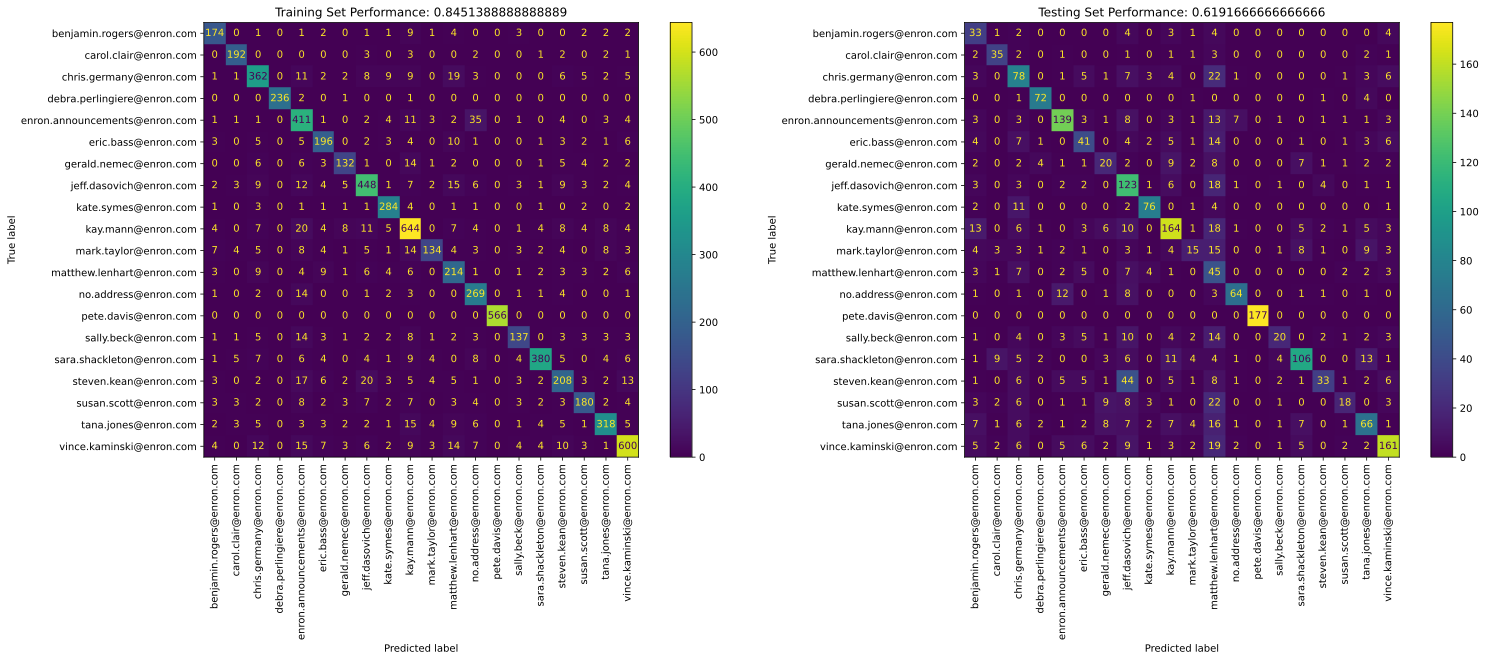

In [ ]:
from sklearn.svm import SVC
sasha_time_1 = time.process_time()
lda = LatentDirichletAllocation(n_components=300, random_state=0)
lda.fit(X_train_counts)

X_train_topics = lda.transform(X_train_counts)
X_test_topics = lda.transform(X_test_counts)
X_val_topics = lda.transform(X_val_counts)

svm = SVC(C= 1200, gamma= 0.1, kernel= 'rbf')
svm.fit(X_train_topics, train_Y)
sasha_time_2 = time.process_time()
#print('Time to model LDA and SVM (Training):     %f seconds' % (sasha_time_2 - sasha_time_1))

sasha_time_1 = time.process_time()
eval_model(svm, X_train_topics, train_Y, X_test_topics, test_Y)
sasha_time_2 = time.process_time()
#print('Time to model LDA and SVM (Inference):     %f seconds' % (sasha_time_2 - sasha_time_1))

In [ ]:
#Gridsearch for SVM parameters

param_grid = [{'C': [10,100,100,1000], 'kernel': ['linear']},
  {'C': [10,100,1000,1100,1200,1300], 'gamma': [0,0.1,0.01,0.001], 'kernel': ['rbf']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train_topics, train_Y)
grid_search.cv_results_

best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)



{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}




---



---



# Export to PDF

In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('Group 43 Assessment 2.ipynb')